# Machine Learning Pipeline

### <center> Predicting Survival on the Titanic Dataset </center>


## Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import streamlit as st

### <center>Section 01 : Data Loading</center>
#### In this section, we will load the necessary data for our analysis.

In [2]:
# Set plot style for better visuals
sns.set(style="whitegrid")


# Section 1: Data Loading
# Load the Titanic dataset from seaborn
print("\nLoading Titanic dataset...")
data = sns.load_dataset('titanic')
print("Data Loaded Successfully. Here's a preview:")
print(data.head())


Loading Titanic dataset...
Data Loaded Successfully. Here's a preview:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### <center>Section 02: Data Preprocessing</center>

#### Step 1: Check Null Values

In [3]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
#Checiking Missing Values Percentage
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})

In [5]:
#Sorting Missing values Percentages
missing_value_df.sort_values('percent_missing',ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
deck,deck,77.216611
age,age,19.865320
embarked,embarked,0.224467
embark_town,embark_town,0.224467
survived,survived,0.000000
pclass,pclass,0.000000
sex,sex,0.000000
sibsp,sibsp,0.000000
parch,parch,0.000000
fare,fare,0.000000


#### Step 2: Droping Null Values

##### - Drop columns with too many missing values or irrelevant for prediction
##### - Fill missing values
##### - Drop rows where 'embarked' or 'age' is still missing (if any)
##### - Drop unneccessary Cloumns

In [6]:
print("\nPreprocessing data...")
# Drop columns with too many missing values or irrelevant for prediction
data.drop(['deck', 'embark_town', 'alive'], axis=1, inplace=True)


Preprocessing data...


In [7]:
# Fill missing values
data['age'].fillna(data['age'].median(), inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

In [8]:
# Drop rows where 'embarked' or 'age' is still missing (if any)
data.dropna(subset=['embarked', 'age'], inplace=True)

In [9]:
# Drop columns unlikely to help with prediction
data.drop(['who', 'adult_male', 'embarked', 'class'], axis=1, inplace=True)

#### Step 3: Encoding Categorical Variables

In [10]:
# Encode categorical variables
label_encoders = {}
#for column in ['sex', 'embarked', 'class', 'who', 'adult_male', 'alone']:
for column in ['sex',  'alone']:
    
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

### <center>Section 03: Exploratory Data Analysis (EDA)</center>

##### - Plotting Survival Count
##### - Plotting Age Distribution
##### - Plotting Feature Correlation

In [11]:
print("\nPerforming Exploratory Data Analysis...")


Performing Exploratory Data Analysis...


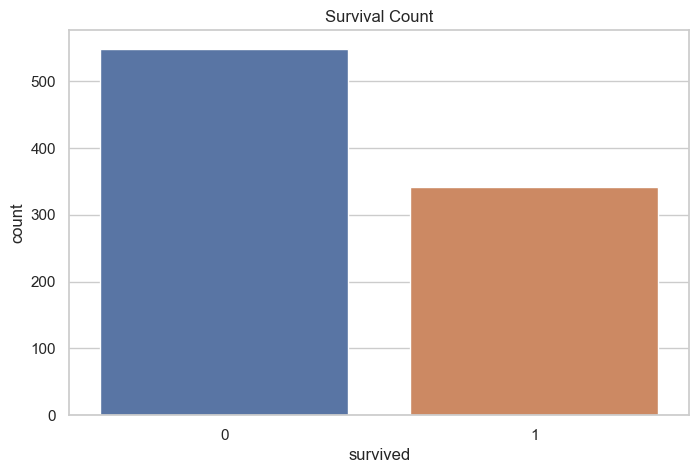

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='survived', data=data)
plt.title('Survival Count')
plt.show()

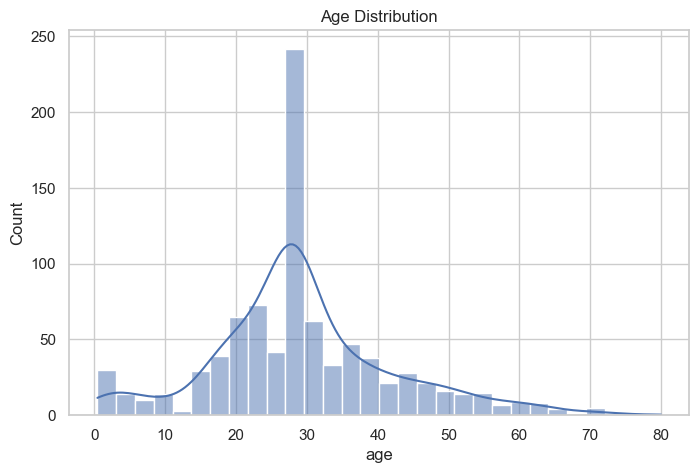

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

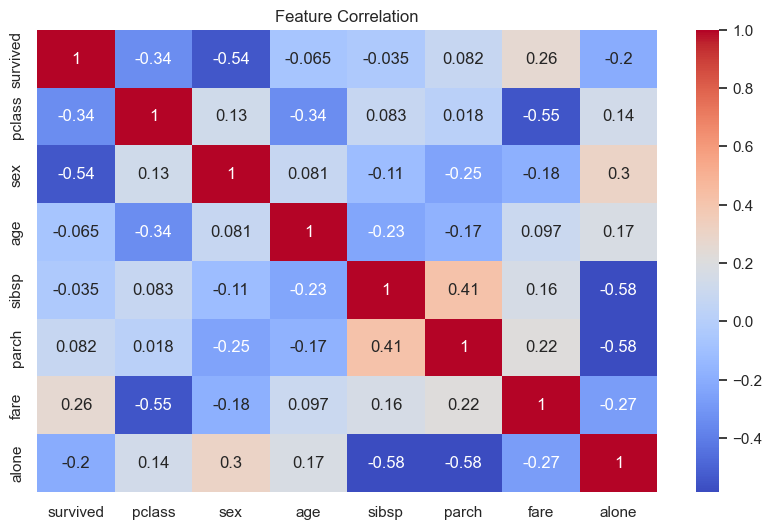

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

### <center>Section 04: Model Building</center>

##### - Splittin Data into train / test Splits
##### - Feature Scaling
##### - Train Classifier

In [15]:
print("\nBuilding machine learning model...")
# Define features and target variable
X = data.drop('survived', axis=1)
y = data['survived']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Building machine learning model...


In [16]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
print("\n training Machine learning model Started...")
model.fit(X_train_scaled, y_train)
print("\n training Machine learning model Ended...")


 training Machine learning model Started...

 training Machine learning model Ended...


### <center>Section 05: Model Evaluation</center>

In [18]:
print("\nEvaluating model performance...")
y_pred = model.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Evaluating model performance...

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
[[89 16]
 [19 55]]


### <center>Section 06: Model Deployment</center>

##### - Saving Model Weights as pickle
##### - Saving Featuer Scaling Instance as pickle
##### - Building a Prediction Function for new inputs
##### - Predicting new inputs ...

In [19]:
print("\nSaving model and scaler for deployment...")
# Save model and scaler using joblib
joblib.dump(scaler, '../model/scaler.pkl')
joblib.dump(model, '../model/titanic_model.pkl')
print("Model and scaler saved successfully!")


Saving model and scaler for deployment...
Model and scaler saved successfully!


In [20]:
# Function to predict survival based on new input data
def predict_survival(input_data):
    input_df = pd.DataFrame([input_data])
    input_df_scaled = scaler.transform(input_df)
    prediction = model.predict(input_df_scaled)
    return 'Survived' if prediction[0] == 1 else 'Did Not Survive'

In [21]:
# Example prediction
sample_input = X_test.iloc[0].to_dict()
print("\nExample Prediction:", predict_survival(sample_input))



Example Prediction: Did Not Survive


In [22]:
sample_input

{'pclass': 3.0,
 'sex': 1.0,
 'age': 28.0,
 'sibsp': 1.0,
 'parch': 1.0,
 'fare': 15.2458,
 'alone': 0.0}

In [23]:
# Example prediction
sample_input = X_test.iloc[0].to_dict()
print("\nExample Prediction:", predict_survival(sample_input))


Example Prediction: Did Not Survive


In [24]:
# # Example prediction

# # Function to take user inputs and return a dictionary
# def get_user_input():
#     print("\nEnter passenger details:")
#     pclass = float(input("Passenger Class (1, 2, or 3): "))
#     while pclass not in [1.0, 2.0, 3.0]:
#         print("Invalid input. Please enter 1, 2, or 3.")
#         pclass = float(input("Passenger Class (1, 2, or 3): "))
    
#     sex = float(input("Sex (0 for female, 1 for male): "))
#     while sex not in [0.0, 1.0]:
#         print("Invalid input. Please enter 0 for female or 1 for male.")
#         sex = float(input("Sex (0 for female, 1 for male): "))
    
#     age = float(input("Age (0-100): "))
#     while age < 0 or age > 100:
#         print("Invalid input. Please enter an age between 0 and 100.")
#         age = float(input("Age (0-100): "))
    
#     sibsp = float(input("Number of Siblings/Spouses Aboard (0-8): "))
#     while sibsp < 0 or sibsp > 8:
#         print("Invalid input. Please enter a number between 0 and 8.")
#         sibsp = float(input("Number of Siblings/Spouses Aboard (0-8): "))
    
#     parch = float(input("Number of Parents/Children Aboard (0-6): "))
#     while parch < 0 or parch > 6:
#         print("Invalid input. Please enter a number between 0 and 6.")
#         parch = float(input("Number of Parents/Children Aboard (0-6): "))
    
#     fare = float(input("Fare (0-512): "))
#     while fare < 0 or fare > 512:
#         print("Invalid input. Please enter a fare between 0 and 512.")
#         fare = float(input("Fare (0-512): "))
    
#     alone = float(input("Alone (0 for No, 1 for Yes): "))
#     while alone not in [0.0, 1.0]:
#         print("Invalid input. Please enter 0 for No or 1 for Yes.")
#         alone = float(input("Alone (0 for No, 1 for Yes): "))
    
#     return {'pclass': pclass, 'sex': sex, 'age': age, 'sibsp': sibsp, 'parch': parch, 'fare': fare, 'alone': alone}


In [ ]:
# user_data = get_user_input()
# print(user_data)

In [29]:
# # Example prediction
# print("\nExample Prediction:", predict_survival(user_data))


Example Prediction: Survived


In [24]:
# Streamlit Deployment
st.title("Titanic Survival Prediction App")
st.write("Enter passenger details to predict survival:")

pclass = st.selectbox("Passenger Class (1st, 2nd, 3rd):", [1, 2, 3])
sex = st.radio("Sex:", ["Male", "Female"])
age = st.slider("Age:", 0, 100, 28)
sibsp = st.slider("Number of Siblings/Spouses Aboard:", 0, 8, 0)
parch = st.slider("Number of Parents/Children Aboard:", 0, 6, 0)
fare = st.number_input("Fare Paid:", 0.0, 512.0, 15.2458)
alone = st.radio("Alone:", ["Yes", "No"])

sex = 1 if sex == "Male" else 0
alone = 1 if alone == "Yes" else 0

input_data = {'pclass': pclass, 'sex': sex, 'age': age, 'sibsp': sibsp, 'parch': parch, 'fare': fare, 'alone': alone}

if st.button("Predict Survival"):
    model = joblib.load('titanic_model.pkl')
    scaler = joblib.load('scaler.pkl')
    input_df = pd.DataFrame([input_data])
    input_df_scaled = scaler.transform(input_df)
    prediction = model.predict(input_df_scaled)
    result = 'Survived' if prediction[0] == 1 else 'Did Not Survive'
    st.success(f"Prediction: {result}")

2025-04-04 03:01:58.562 
  command:

    streamlit run c:\Users\MHemaly\.conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
